Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9.1161e-04
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.9801e-06
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.9247e-06
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.3006e-06
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.4390e-06
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.6984e-06
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.7148e-06
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.4365e-06
Epoch 9/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.0158e-06
Epoch 10/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.6524e-06
Epoch 11/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.7966e-06
Epoch 12/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.0618e-06
Epoch 13/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.8061e-06
Epoch 14/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.5592e-06
Epoch 15/20


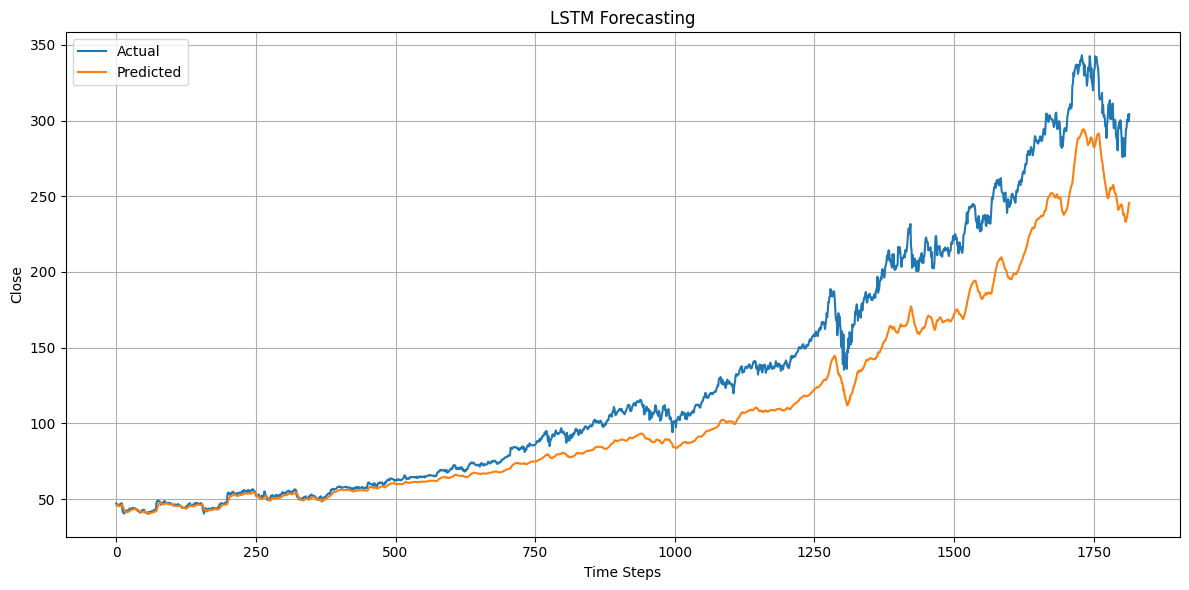

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load and prepare the data
# Assuming the date column is named 'Date' and not 'Month'
# If your date column has a different name, replace 'Date' with the actual name
try:
    df = pd.read_csv("/content/MSFT.csv", parse_dates=['Date'], index_col='Date')
except KeyError:
    # If 'Date' column is not found, try using 'Month'
    try:
        df = pd.read_csv("/content/MSFT.csv", parse_dates=['Month'], index_col='Month')
    except KeyError:
        print("Error: Neither 'Date' nor 'Month' column found in CSV for parsing dates.")
        exit(1)

# Check if '#Passengers' or 'Close' columns exist, otherwise print available columns
data_column = None
if '#Passengers' in df.columns:
    data_column = '#Passengers'
elif 'Close' in df.columns:
    data_column = 'Close'
else:
    print("Error: Neither '#Passengers' nor 'Close' columns found in CSV. Available columns:")
    print(df.columns)
    exit(1)

data = df[[data_column]].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 10
X, y = create_sequences(data_scaled, TIME_STEPS)

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(TIME_STEPS, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, verbose=1)

# Predict
predicted = model.predict(X_test)

# Inverse transform predictions and true values
predicted_unscaled = scaler.inverse_transform(predicted)
y_test_unscaled = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual')
plt.plot(predicted_unscaled, label='Predicted')
plt.title('LSTM Forecasting')
plt.xlabel('Time Steps')
plt.ylabel(data_column)  # Use the determined data column name for the y-axis label
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()